## Imports

In [1]:
from IPython.display import Markdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from ucimlrepo import fetch_ucirepo 
from IPython.display import JSON
  
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 
  
# metadata 
print("Metadata:")
display(JSON(default_of_credit_card_clients.metadata))
  
# variable information 
print("Variable Information:")
print(default_of_credit_card_clients.variables)

Metadata:


<IPython.core.display.JSON object>

Variable Information:
   name     role     type      demographic                 description units  \
0    ID       ID  Integer             None                        None  None   
1    X1  Feature  Integer             None                   LIMIT_BAL  None   
2    X2  Feature  Integer              Sex                         SEX  None   
3    X3  Feature  Integer  Education Level                   EDUCATION  None   
4    X4  Feature  Integer   Marital Status                    MARRIAGE  None   
5    X5  Feature  Integer              Age                         AGE  None   
6    X6  Feature  Integer             None                       PAY_0  None   
7    X7  Feature  Integer             None                       PAY_2  None   
8    X8  Feature  Integer             None                       PAY_3  None   
9    X9  Feature  Integer             None                       PAY_4  None   
10  X10  Feature  Integer             None                       PAY_5  None   
11  X11  Feature  

In [3]:
print(default_of_credit_card_clients.metadata['additional_info']['variable_info'])

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and

In [4]:
Markdown(
    f"""
# Conducting EDA on UCI ML Repo Dataset: Default of Credit Card Clients Dataset

## Type of Data:

- **Tabular Data**: The dataset consists of rows and columns, where each row represents a credit card client and each column represents a feature or attribute of the client.

## Number of Instances and Features:

- **Instances**: {X.shape[0]} credit card clients.
- **Features**: {X.shape[1]} attributes/features per client.

## Target Variable:

- **Default Payment Next Month**: A binary variable indicating whether the client defaulted on their credit card payment the following month (1 = default, 0 = no default).

"""
)


# Conducting EDA on UCI ML Repo Dataset: Default of Credit Card Clients Dataset

## Type of Data:

- **Tabular Data**: The dataset consists of rows and columns, where each row represents a credit card client and each column represents a feature or attribute of the client.

## Number of Instances and Features:

- **Instances**: 30000 credit card clients.
- **Features**: 23 attributes/features per client.

## Target Variable:

- **Default Payment Next Month**: A binary variable indicating whether the client defaulted on their credit card payment the following month (1 = default, 0 = no default).



## About the Categories:

- Gender (1 = male; 2 = female)
- Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
- Marital status (1 = married; 2 = single; 3 = others)

In [5]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [6]:
X.columns = [
    "LIMIT_BAL",
    "SEX",
    "EDUCATION",
    "MARRIAGE",
    "AGE",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
]

In [7]:
X.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


## Analysis

In [8]:
import pprint

pprint.pprint(default_of_credit_card_clients.metadata)

{'abstract': "This research aimed at the case of customers' default payments "
             'in Taiwan and compares the predictive accuracy of probability of '
             'default among six data mining methods.',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': "This research aimed at the case of customers' "
                                'default payments in Taiwan and compares the '
                                'predictive accuracy of probability of default '
                                'among six data mining methods. From the '
                                'perspective of risk management, the result of '
                                'predictive accuracy of the estima

In [9]:
y_dist = y.value_counts() / len(y) * 100
default_rate = y_dist[y_dist.index == np.int64(1)].iloc[0]

Markdown(f"""
### TARGET VARIABLE:
- Default rate: {default_rate:.2f}%
- Class imbalance ratio: Yes vs No Ratio: {y_dist[y_dist.index == np.int64(1)].iloc[0]/y_dist[y_dist.index == np.int64(0)].iloc[0]:.2f}:1
- Recommendation: Address imbalance using SMOTE.
""")


### TARGET VARIABLE:
- Default rate: 22.12%
- Class imbalance ratio: Yes vs No Ratio: 0.28:1
- Recommendation: Address imbalance using SMOTE.


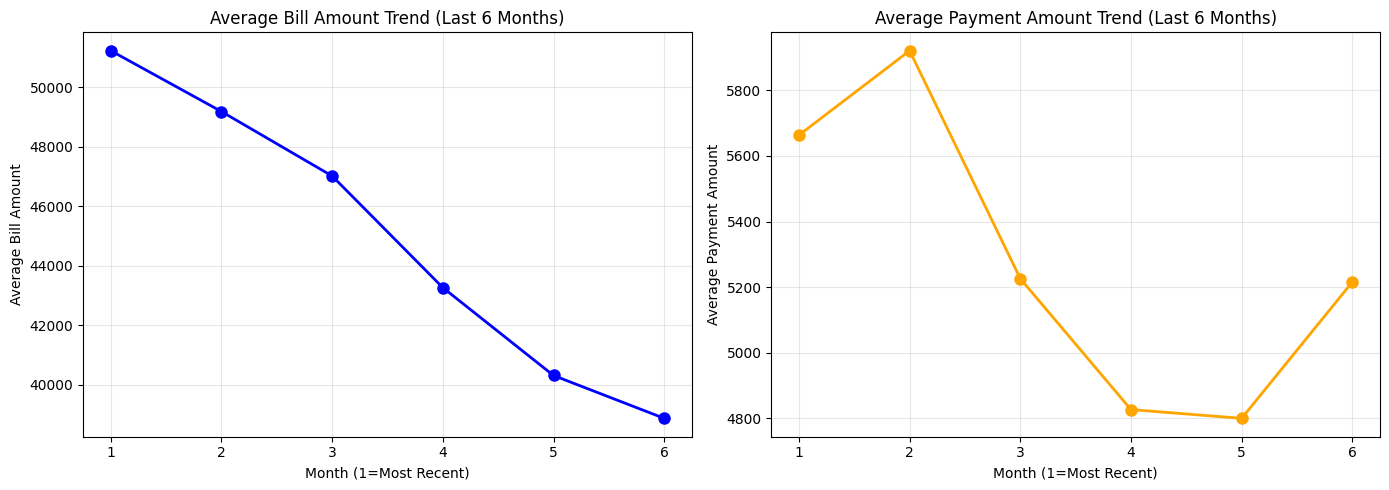

In [10]:
# Analyze bill and payment amounts over time
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Average bill and payment amounts
avg_bills = X[bill_cols].mean()
avg_payments = X[pay_cols].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bill amounts trend
axes[0].plot(range(1, 7), avg_bills, marker='o', linewidth=2, markersize=8, color='blue')
axes[0].set_title('Average Bill Amount Trend (Last 6 Months)', fontsize=12)
axes[0].set_xlabel('Month (1=Most Recent)')
axes[0].set_ylabel('Average Bill Amount')
axes[0].grid(True, alpha=0.3)

# Payment amounts trend
axes[1].plot(range(1, 7), avg_payments, marker='o', linewidth=2, markersize=8, color='orange')
axes[1].set_title('Average Payment Amount Trend (Last 6 Months)', fontsize=12)
axes[1].set_xlabel('Month (1=Most Recent)')
axes[1].set_ylabel('Average Payment Amount')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### **Observation:** On average the bill amount are more than payment amounts, indicating that on average, clients are not paying their full bill amounts each month.

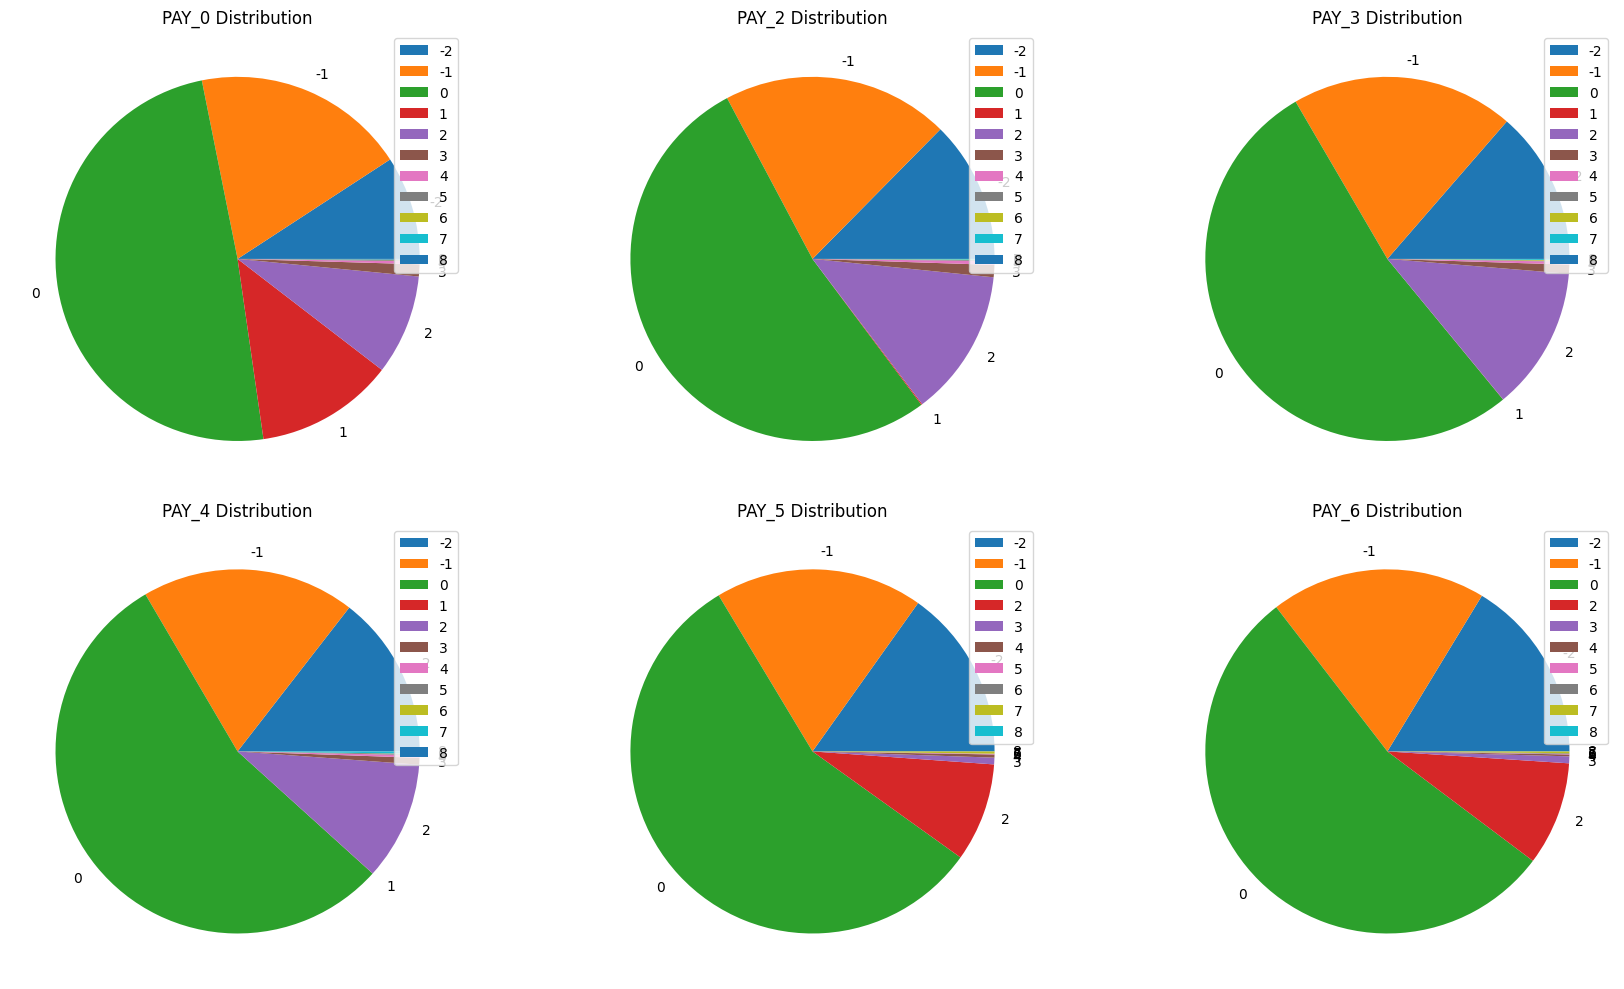

In [11]:
# Analyze payment status features
payment_cols = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

# Visualize payment status
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(payment_cols):
    X[col].value_counts().sort_index().plot(kind="pie", ax=axes[idx])
    axes[idx].set_title(f"{col} Distribution")
    axes[idx].set_ylabel("")
    axes[idx].legend(loc="upper right")

plt.tight_layout()
plt.show()

### **Observation:** Most customers consistently have a payment status of 0 (on-time) across all months, showing a strong bias toward timely payers with relatively few chronic defaulters.

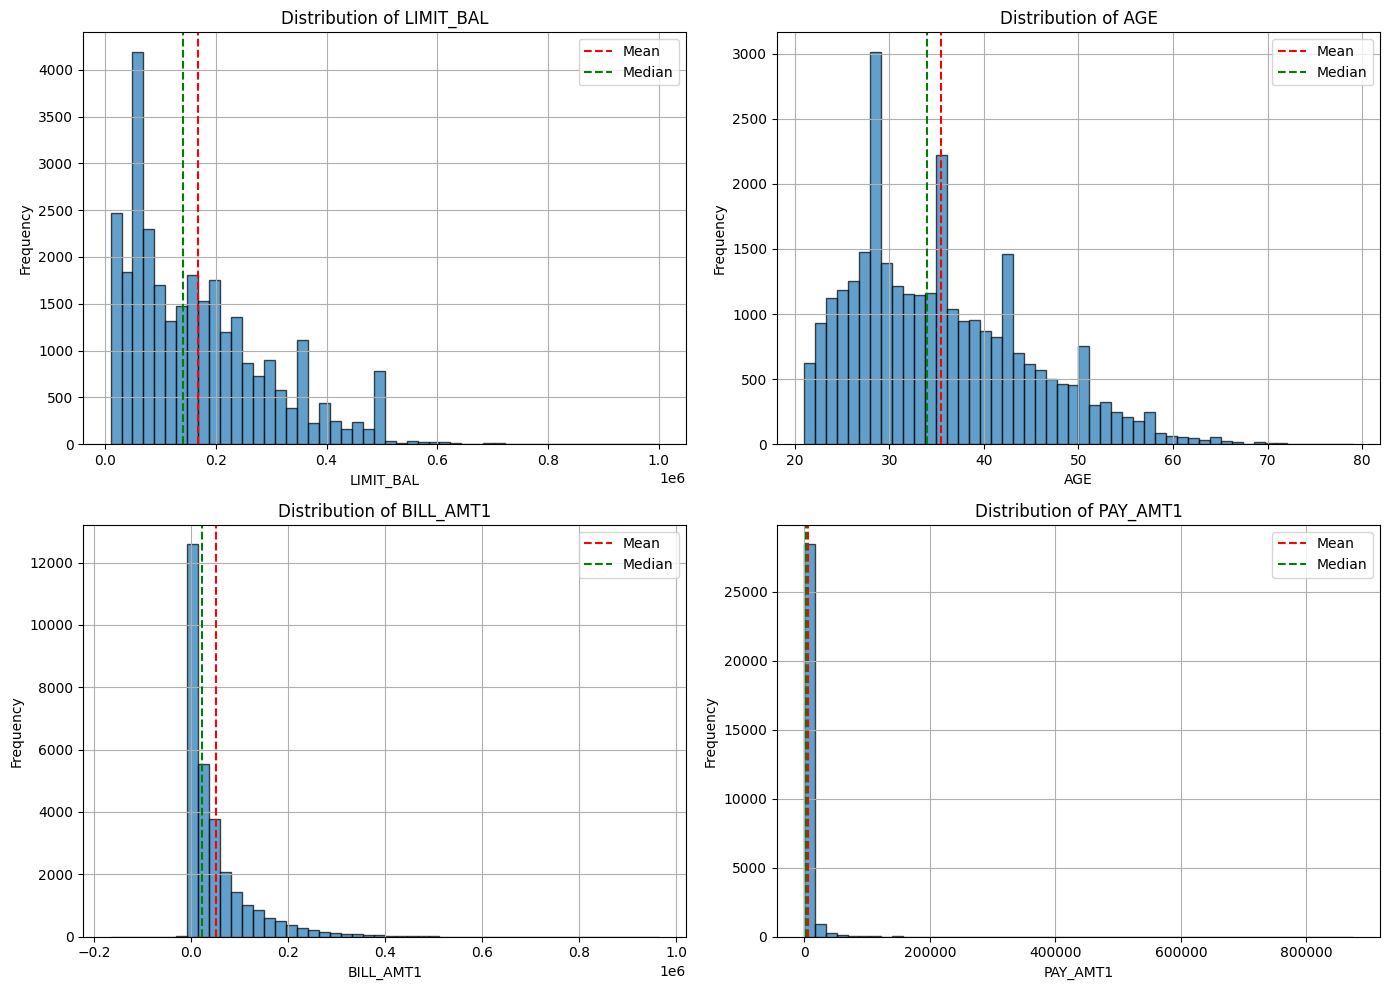

In [12]:
# Distribution of key numerical features
numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(X[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(X[col].mean(), color='red', linestyle='--', label='Mean')
    axes[idx].axvline(X[col].median(), color='green', linestyle='--', label='Median')
    axes[idx].legend()
    axes[idx].grid()

plt.tight_layout()
plt.show()

### **Observation**: Most people have lower values for LIMIT_BAL (credit limit), BILL_AMT1 (bill amount), and PAY_AMT1 (payment amount), with only a few people having very high values.

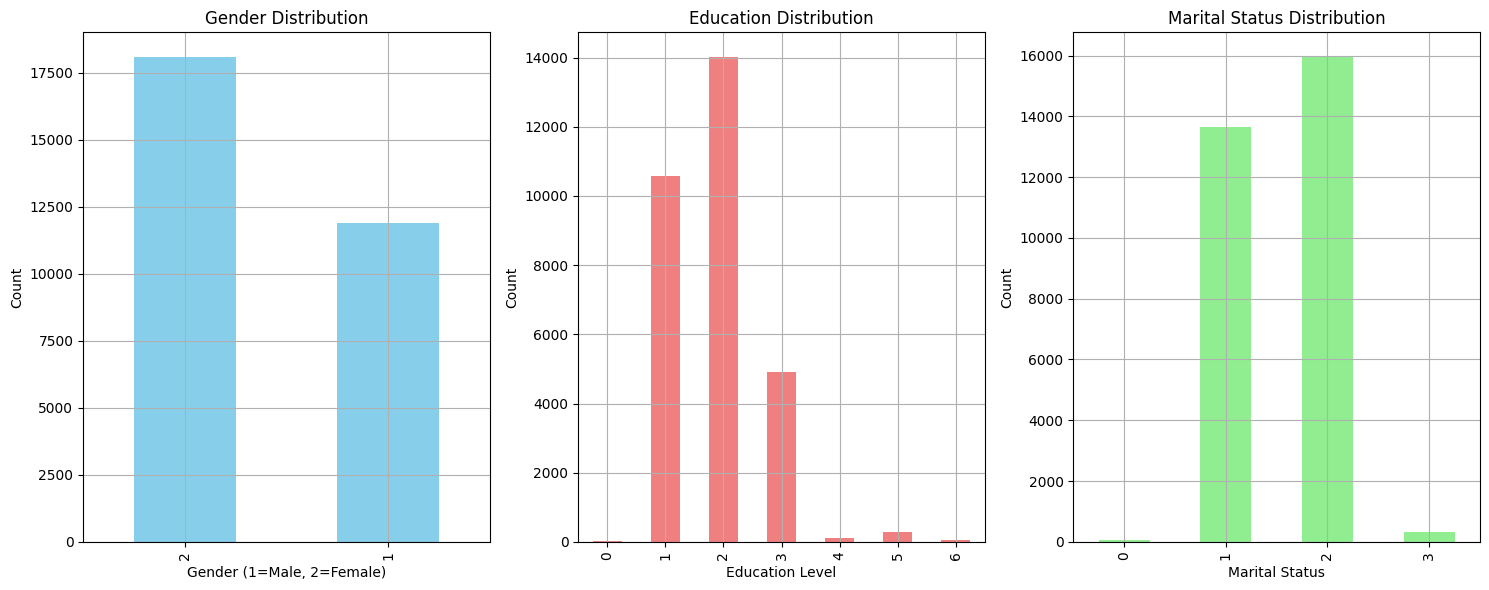

In [13]:
# Visualize categorical features
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# SEX
X['SEX'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender (1=Male, 2=Female)')
axes[0].set_ylabel('Count')
axes[0].grid()

# EDUCATION
X['EDUCATION'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Education Distribution')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Count')
axes[1].grid()

# MARRIAGE
X['MARRIAGE'].value_counts().sort_index().plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Marital Status Distribution')
axes[2].set_xlabel('Marital Status')
axes[2].set_ylabel('Count')
axes[2].grid()

plt.tight_layout()
plt.show()

### **Observation:** Females, college-educated individuals, and married people form the largest demographic groups.

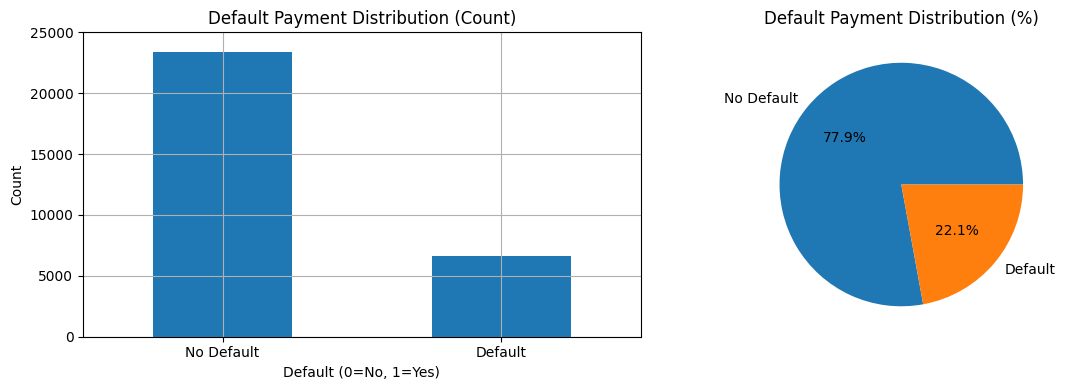

Class Imbalance Ratio: 3.5207956600361663


In [14]:
# Visualize target distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
y.value_counts().plot(kind="bar", ax=ax[0])
ax[0].set_title("Default Payment Distribution (Count)")
ax[0].set_xlabel("Default (0=No, 1=Yes)")
ax[0].set_ylabel("Count")
ax[0].set_xticklabels(["No Default", "Default"], rotation=0)
ax[0].set_ylim(0, 25_000)
ax[0].grid()

# Pie chart
y.value_counts().plot(
    kind="pie",
    ax=ax[1],
    autopct="%1.1f%%",
    labels=["No Default", "Default"],
)
ax[1].set_ylabel("")
ax[1].set_title("Default Payment Distribution (%)")

plt.tight_layout()
plt.show()

# Check for class imbalance
print("Class Imbalance Ratio:", y.value_counts()[0] / y.value_counts()[1])

### **Observation:** Only 22% of customers defaulted on payments; the target is imbalanced with most customers (78%) not defaulting.

## Feature Engineering

In [15]:
# Feature Engineering
data_analysis = X.copy()
data_analysis['Y'] = y['Y']

# Average bill amount
data_analysis['avg_bill'] = data_analysis[bill_cols].mean(axis=1)

# Average payment amount
data_analysis['avg_payment'] = data_analysis[pay_cols].mean(axis=1)

# Payment to bill ratio
data_analysis['payment_ratio'] = data_analysis['avg_payment'] / (data_analysis['avg_bill'] + 1)

# Number of times payment was delayed (PAY_X > 0)
data_analysis['num_delays'] = (data_analysis[payment_cols] > 0).sum(axis=1)

# Credit utilization (bill to limit ratio)
data_analysis['credit_utilization'] = data_analysis['BILL_AMT1'] / (data_analysis['LIMIT_BAL'] + 1)

print("Derived Features Statistics:")
pd.DataFrame(data_analysis[['avg_bill', 'avg_payment', 'payment_ratio', 'num_delays', 'credit_utilization']].describe())

Derived Features Statistics:


,avg_bill,avg_payment,payment_ratio,num_delays,credit_utilization
count,30000.000000,30000.000000,29998.000000,30000.000000,30000.000000
mean,44976.945200,5275.232094,3.765960,0.834200,0.423764
std,63260.721860,10137.946323,209.650970,1.554303,0.411454
min,-56043.166667,0.000000,-1502.000000,0.000000,-0.619890
25%,4781.333333,1113.291667,0.041074,0.000000,0.022031
50%,21051.833333,2397.166667,0.086201,0.000000,0.313991
75%,57104.416667,5583.916667,0.598093,1.000000,0.829821
max,877313.833333,627344.333333,27000.000000,6.000000,6.454977


### **Observation:** Most customers have low average bills, payments, payment ratios, and few delays, but a small minority have extremely high values and high utilization, again indicating strong skewness and presence of outliers.

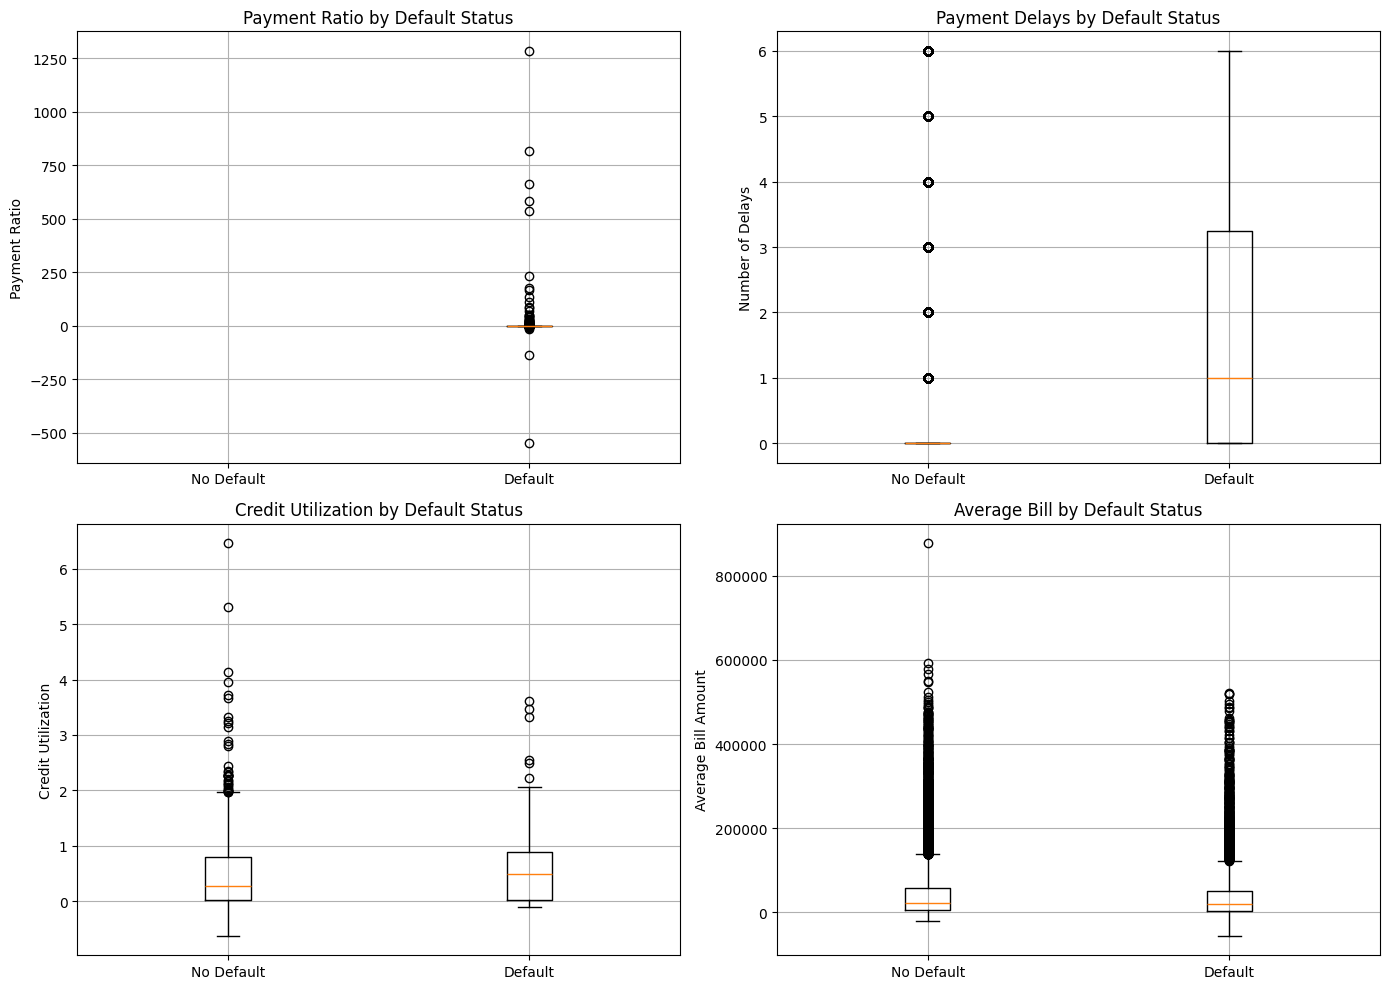

In [16]:
# Analyze derived features vs target
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Payment ratio by default status
axes[0, 0].boxplot([
    data_analysis[data_analysis['Y'] == 0]['payment_ratio'],
    data_analysis[data_analysis['Y'] == 1]['payment_ratio']
])
axes[0, 0].set_xticklabels(['No Default', 'Default'])
axes[0, 0].set_ylabel('Payment Ratio')
axes[0, 0].set_title('Payment Ratio by Default Status')
axes[0, 0].grid()

# Number of delays by default status
axes[0, 1].boxplot([
    data_analysis[data_analysis['Y'] == 0]['num_delays'],
    data_analysis[data_analysis['Y'] == 1]['num_delays']
])
axes[0, 1].set_xticklabels(['No Default', 'Default'])
axes[0, 1].set_ylabel('Number of Delays')
axes[0, 1].set_title('Payment Delays by Default Status')
axes[0, 1].grid()

# Credit utilization by default status
axes[1, 0].boxplot([
    data_analysis[data_analysis['Y'] == 0]['credit_utilization'],
    data_analysis[data_analysis['Y'] == 1]['credit_utilization']
])
axes[1, 0].set_xticklabels(['No Default', 'Default'])
axes[1, 0].set_ylabel('Credit Utilization')
axes[1, 0].set_title('Credit Utilization by Default Status')
axes[1, 0].grid()

# Average bill by default status
axes[1, 1].boxplot([
    data_analysis[data_analysis['Y'] == 0]['avg_bill'],
    data_analysis[data_analysis['Y'] == 1]['avg_bill']
])
axes[1, 1].set_xticklabels(['No Default', 'Default'])
axes[1, 1].set_ylabel('Average Bill Amount')
axes[1, 1].set_title('Average Bill by Default Status')
axes[1, 1].grid()

plt.tight_layout()
plt.show()

### **Observation:** Defaulters tend to have much higher payment delays and more extreme payment ratios, while both default and non-default groups show large outliers in average bills and credit utilization, but the median values do not differ drastically.

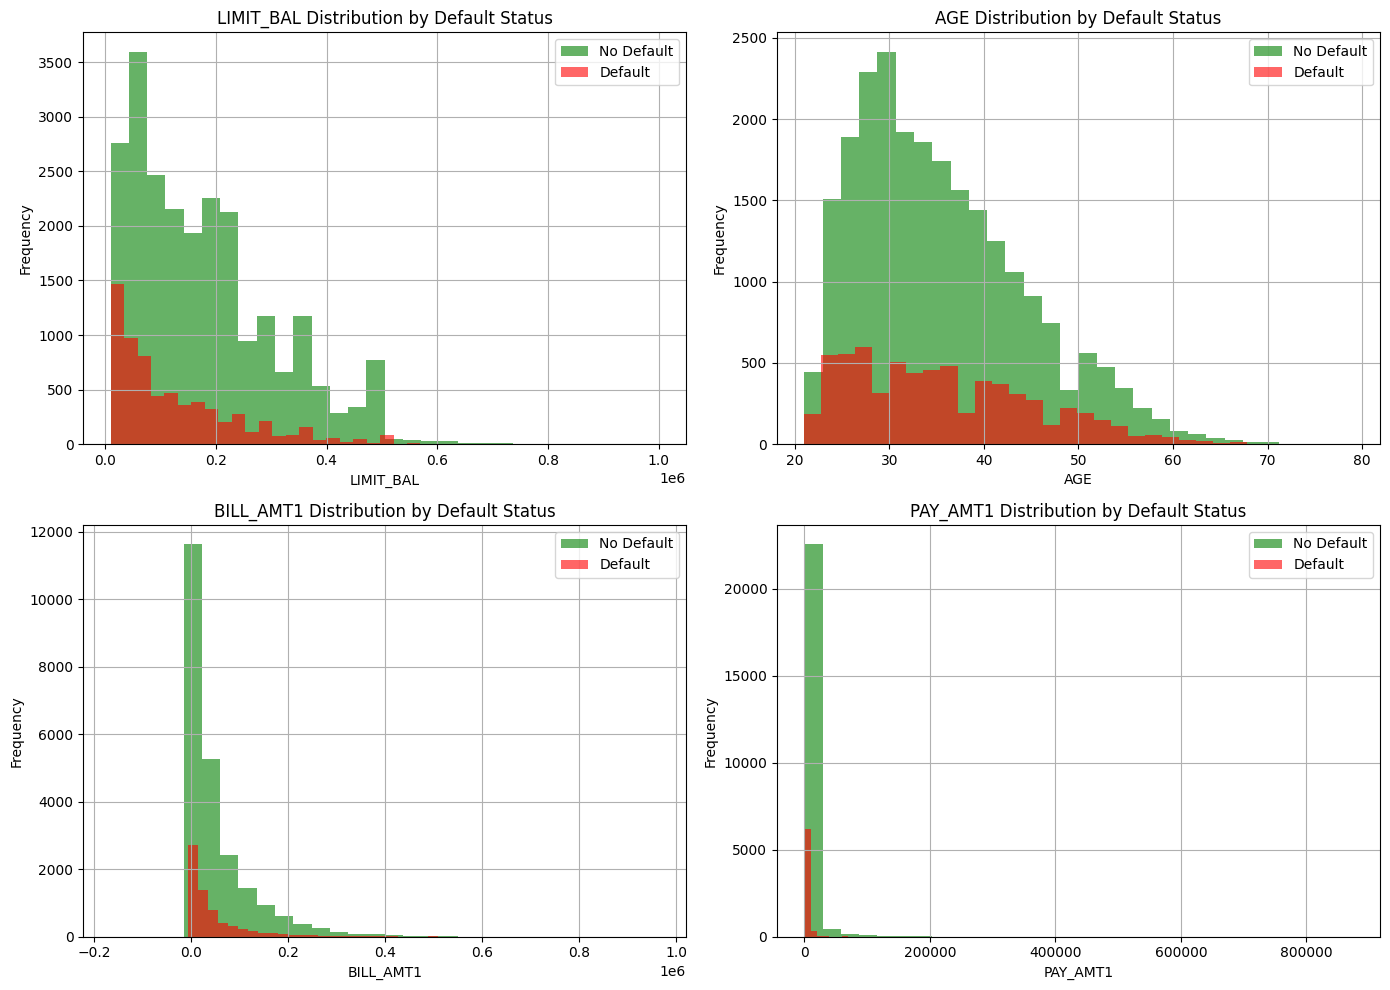

In [17]:
# Numerical features distribution by target
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(["LIMIT_BAL", "AGE", "BILL_AMT1", "PAY_AMT1"]):
    data_analysis[data_analysis["Y"] == 0][col].hist(
        ax=axes[idx],
        bins=30,
        alpha=0.6,
        label="No Default",
        color="green",
    )
    data_analysis[data_analysis["Y"] == 1][col].hist(
        ax=axes[idx],
        bins=30,
        alpha=0.6,
        label="Default",
        color="red",
    )
    axes[idx].set_title(f"{col} Distribution by Default Status")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Frequency")
    axes[idx].legend()
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

### **Observation:** For the numerical features shown, defaulters tend to have lower credit limits, are somewhat younger, and have lower bill and payment amounts compared to non-defaulters, with all distributions showing right skew and strong overlap between default and non-default groups.

# Conclusion:

## Summary of Key Findings:

### 1. **Data Quality**
- The dataset contains **30,000 samples** with **23 features** and no missing values or duplicates
- Clean, well-structured tabular data suitable for machine learning applications

### 2. **Class Imbalance**
- Default rate: **~22%** (approximately 1:3.5 ratio)
- Significant class imbalance requiring techniques like SMOTE for supervised learning
- For unsupervised clustering, this imbalance provides a natural ground truth for validation

### 3. **Feature Correlations**
- **Payment status features (PAY_0 to PAY_6)** show the strongest correlation with default behavior
- **Credit utilization** and **payment delays** are strong indicators of default risk
- Bill amounts and payment amounts show temporal patterns but weaker direct correlation with target

### 4. **Behavioral Patterns**
- Defaulters tend to have:
  - Higher number of payment delays
  - Lower payment-to-bill ratios
  - Higher credit utilization rates
  - More frequent late payment histories

### 5. **Demographic Insights**
- Gender, education, and marital status show **minor differences** in default rates
- Age and credit limit (LIMIT_BAL) show some distributional differences between defaulters and non-defaulters

---

## Feature Selection for Unsupervised Clustering:

### **Recommended Feature Set (12 features):**

#### **A. Payment Behavior Features (Most Important - 6 features):**
1. `PAY_0` - Most recent payment status (strongest correlation with default)
2. `PAY_2` - Payment status 2 months ago
3. `PAY_3` - Payment status 3 months ago
4. `PAY_4` - Payment status 4 months ago
5. `PAY_5` - Payment status 5 months ago
6. `PAY_6` - Payment status 6 months ago

**Rationale:** These features capture the temporal payment behavior pattern and show the highest correlation with default. They contain critical information about payment discipline.

#### **B. Credit Utilization Features (3 features):**
7. `LIMIT_BAL` - Credit limit
8. `BILL_AMT1` - Most recent bill statement
9. `PAY_AMT1` - Most recent payment amount

**Rationale:** These features help identify credit utilization patterns and payment capacity. The ratio of bill to limit and payment to bill are key indicators of financial health.

#### **C. Derived Features (3 features to engineer):**
10. `credit_utilization` = BILL_AMT1 / (LIMIT_BAL + 1)
11. `payment_ratio` = avg(PAY_AMT1-6) / (avg(BILL_AMT1-6) + 1)
12. `num_delays` = count(PAY_0 to PAY_6 where value > 0)

**Rationale:** These engineered features capture complex relationships and behavioral patterns that individual features might miss.

---

### **Features to Exclude:**

- **AGE, SEX, EDUCATION, MARRIAGE:** Weak correlation with target; may introduce **demographic bias**
- **BILL_AMT2-6, PAY_AMT2-6:** Redundant temporal information already captured by engineered features and most recent values
- **PAY_AMT4-6:** Older payment amounts with potentially low predictive value